*2025 Spring DSAA 2011 Maching Learning*
## Lab Note 07
*Yang Luo, Zixin Zhong* \
*Hong Kong University of Science and Technology (Guangzhou)*

# **Question 1: Binary Classification using SVM**

In this task, we will apply **Support Vector Machine (SVM)** for a **binary classification** problem using the **Iris dataset**.

**Dataset Source**: [Iris Dataset - Kaggle](https://www.kaggle.com/datasets/vikrishnan/iris-dataset/data)  
**Dataset File**: `LA07-iris.data.csv`  

### **Tasks**  

**1. Data Preparation**
- Divide the dataset into **training** and **testing** sets.  

**2. Train the SVM Model**
- Train an **SVM classifier** using the training data with **C = 100** as the default setting.

**3. Visualize the Decision Boundary**
- Plot the decision boundary learned by the SVM model.
- Highlight the **support vectors**.

**4. Model Evaluation**
- Use the **test set** to evaluate the trained model.
- (Optional) Compute and display the **confusion matrix**.

**5. Experiment with Different Regularization Values**
- Train the model with different values of **C**:  
  - \( C = 1 \)  
  - \( C = 10 \)  
  - \( C = 100 \)  
- Compare the decision boundaries and classification performance for different values of \( C \).

### **Tips**
- **Regularization Parameter \( C \)**:  
  - A **small \( C \)** allows for **more margin violations**, leading to a **simpler model** (higher bias, lower variance).  
  - A **large \( C \)** tries to **minimize misclassification**, making the model **more complex** (lower bias, higher variance).  
- Observe how changing \( C \) affects the **decision boundary** and **support vectors**.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

# read and load dataset
data = pd.read_csv('LA07-iris.data.csv', header=None)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
print(data.head())
# select only two classes for binary classification
data = data[data['species'].isin(['Iris-setosa', 'Iris-versicolor'])]
# select only two features for simplicity
x = data.iloc[:, [0, 1]]
y = data['species']
# convert the target variable to binary
y = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1})

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


**Your solution here:**

In [14]:
#1. Split the data into training and test sets using dataset (x,y)
# ===================== Your Code Here =====================
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# ==========================================================


In [ ]:
# 2. Train the SVM model using the training set
# ===================== Your Code Here =====================
svc = svm.SVC()
svc.fit(x_train, y_train)
# ==========================================================


In [ ]:
# 3. Plot the decision boundary and support vectors
# ===================== Your Code Here =====================

# ==========================================================


In [4]:
# 4. Evaluate the model using the testing set and show confusion matrix
# ===================== Your Code Here =====================
# ==========================================================


In [5]:
# 5. Try different values of C
# ===================== Your Code Here =====================
# ==========================================================


# **Question 2: Analysis of SVM Classification Performance**  

When using Support Vector Machines (SVMs) for a **binary classification** task, the following two sets of experimental results were observed. Please **analyze the possible reasons based on the principles of SVM**:  

### **Experimental Results:**  
1. **Case 1:**  
   - Training set accuracy: **90%**  
   - Validation set accuracy: **90%**  
   - Test set accuracy: **88%**  

2. **Case 2:**  
   - Training set accuracy: **98%**  
   - Validation set accuracy: **90%**  
   - Test set accuracy: **88%**  

### **Tips:**  
Consider the principle of **SVM as a soft-margin classifier**, where the optimization problem is formulated as follows:  

\begin{aligned}  
 \min_{(\mathbf{\theta}, \theta_0) \in \mathbb{R}^d \times \mathbb{R}} \frac{1}{2} \| \mathbf{\theta} \|^2 & + C\sum_{t=1}^{n} \epsilon_t \\  
 \text{s.t.} \quad y_t ( x_t^T \mathbf{\theta} + \theta_0) & \geq 1 - \epsilon_t, \quad \forall t=1,2,\dots,n \\  
\epsilon_t & \geq 0, \quad \forall t=1,2,\dots,n  
\end{aligned}  

### **Key Questions for Analysis:**  
- How does the choice of **regularization parameter** \( C \) influence the decision boundary and generalization ability?  
- What do these accuracy patterns suggest about **underfitting** vs. **overfitting**?  
- Why does the second case have higher training accuracy but the same validation and test accuracy as the first case?  
- What adjustments can be made to improve generalization performance?  

Provide a detailed explanation based on the principles of **SVM margin theory**, **soft-margin classification**, and **model generalization**.


**Your solution here:**  

# **Question 3: Nonlinear Classification using SVM**  

In this section, we will explore **nonlinear classification** using Support Vector Machines (SVMs). In previous exercises, such as **Question 1**, we performed **binary classification** using a **linear SVM**. However, in many real-world scenarios, data is **not linearly separable**—meaning that a straight line (or hyperplane) cannot effectively separate the classes.  

To handle such cases, we can use **SVMs with nonlinear kernels**. Specifically, we will apply an **SVM with a Gaussian kernel** to two different datasets:  

- `LA07-nonlinear-data1.csv`  
- `LA07-nonlinear-data2.csv`  

These datasets contain data points that cannot be separated by a simple linear boundary. Instead, we will leverage the power of **kernel functions** to transform the input space into a higher-dimensional feature space, where the data becomes linearly separable.  

**Provided Dataset Visualizations:**  

1. LA07-nonlinear-data1.csv
<p align="center">
  <img src="LA07-nonlinear-data1.png" alt="Data1" width="10%">
</p>

2. LA07-nonlinear-data2.csv
<p align="center">
  <img src="LA07-nonlinear-data2.png" alt="Data1" width="10%">
</p>

### **Tasks**  
Now, you are required to complete the following tasks:  

1. **Implement the Gaussian kernel function**.  
2. **Train an SVM model using the Gaussian kernel** on the two datasets (`LA07-nonlinear-data1.csv` and `LA07-nonlinear-data2.csv`).  
3. **Visualize the decision boundary** to illustrate how the kernel SVM separates the two classes.  
4. **Experiment with different kernel functions** (e.g., polynomial, sigmoid) and **compare their performance** on the datasets.  

**Tips:**

1. **SVM for non-linear classification:**

* Instead of defining a nonlinear model in the original (input) space, the problem is mapped to a new (feature) space by performing a **nonlinear transformation** using a suitably chosen **basis functions**. 
* The basis functions are often defined implicitly via definning kernel functions directly. 
* In this new feature space, the problem is expected to be linearly separable. The SVM model can then be applied to find the optimal hyperplane in this new space. 

<p align="center">
  <img src="LA07-kernel.png" alt="Kernel Trick" width="10%">
</p>

2. **Guassian kernel:**

* You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples (x(i), x(j)). 
* The Gaussian kernel is also parameterized by a bandwidth parameter $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.
And the definition of the Gaussian kernel is:
$$
K_{\text{gaussian}}(x^{(i)}, x^{(j)}) = \exp\left(-\frac{\|x^{(i)} - x^{(j)}\|^2}{2\sigma^2}\right) = \exp \left(-\frac{\sum_{k=1}^{n}(x_k^{(i)} - x_k^{(j)})^2}{2\sigma^2}\right)
$$


**Your solution here:**

In [6]:
# 1. Implement Gaussian kernel function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm

def gaussian_kernel(x1, x2, sigma=.1):
    """
    The guassian kernel function
    :param x1: input vector
    :param x2: input vector
    :param sigma: bandwidth parameter
    :return: similarity between x1 and x2
    """
    x1 = x1.flatten()
    x2 = x2.flatten()

    sim = 0

    # ===================== Your Code Here =====================
    # ==========================================================
    
    
    return sim

In [7]:
# test your implementation, if the output is 0.324652, it is correct
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussian_kernel(x1, x2, sigma)
print(sim) 

0


         x1        x2  label
0  0.107143  0.603070      1
1  0.093318  0.649854      1
2  0.097926  0.705409      1
3  0.155530  0.784357      1
4  0.210829  0.866228      1


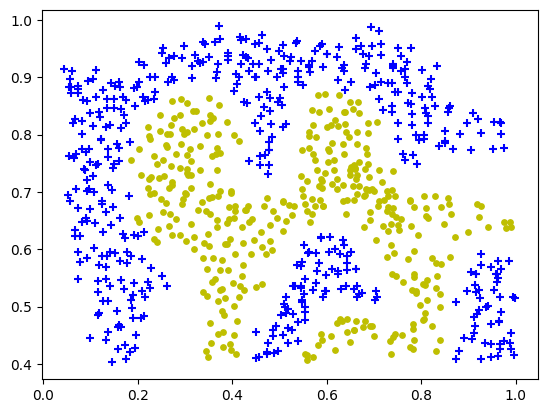

In [8]:
# Load the dataset and visualize the data
def plot_data(X, y):
    plt.figure()
    pos = np.where(y == 1.)[0]
    neg = np.where(y == 0.)[0]

    plt.scatter(X[pos, 0], X[pos, 1], marker="+", c='b')
    plt.scatter(X[neg, 0], X[neg, 1], marker="o", c='y', s=15)

data = pd.read_csv('LA07-nonlinear-data1.csv', header=None, skiprows=1)
data.columns = ['x1', 'x2', 'label']
print(data.head())

X = data.iloc[:, [0, 1]]
y = data.iloc[:, 2]
plot_data(X.values, y.values)

         x1        x2  label
0  0.107143  0.603070      1
1  0.093318  0.649854      1
2  0.097926  0.705409      1
3  0.155530  0.784357      1
4  0.210829  0.866228      1


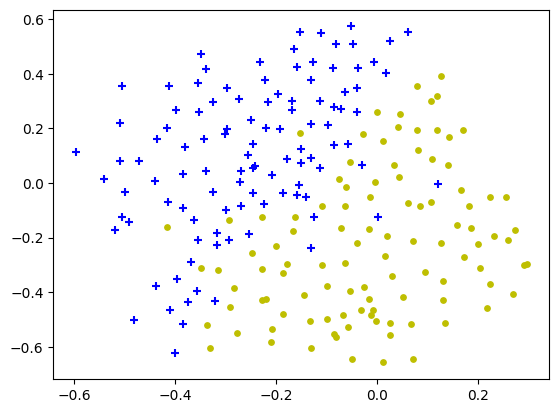

In [9]:
data2 = pd.read_csv('LA07-nonlinear-data2.csv', header=None, skiprows=1)
data2.columns = ['x1', 'x2', 'label']
print(data.head())

X2 = data2.iloc[:, [0, 1]]
y2 = data2.iloc[:, 2]
plot_data(X2.values, y2.values)

In [10]:
# 2.1 Train the SVM model using the Gaussian kernel on dataset 1
def kernel(x1, x2):
    n = x1.shape[0]
    m = x2.shape[0]
    K = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            K[i, j] = gaussian_kernel(x1[i], x2[j])
    return K

# ===================== Your Code Here =====================
# ==========================================================
# clf = 


NameError: name 'clf' is not defined

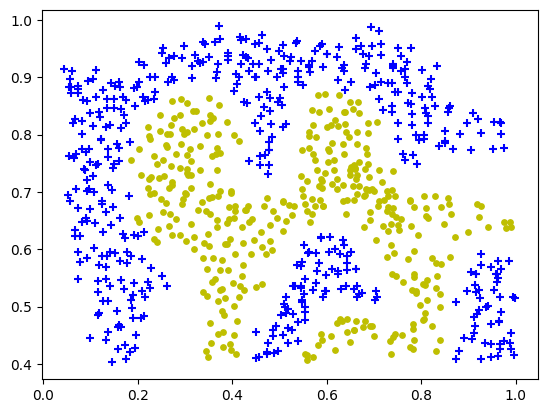

In [11]:
# 3. visualize the decision boundary
def visualize_boundary(clf, x1_min, x1_max, x2_min, x2_max):
    """
    Visualize the decision boundary
    :param clf: the trained SVM model
    :param x_min: minimum value of x
    :param x_max: maximum value of x
    :param y_min: minimum value of y
    :param y_max: maximum value of y
    """

    h = .02
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    
    # ===================== Your Code Here =====================
    # Hint: 
    # step1. Predict the value of Z using the trained model
    # step2. Reshape Z to the same shape as xx
    # step3. Plot the contour of Z
    # ==========================================================
    

plot_data(X.values, y.values)
visualize_boundary(clf, X['x1'].min(), X['x1'].max(), X['x2'].min(), X['x2'].max())

In [ ]:
# 2.2. Train the SVM model using the Gaussian kernel on dataset 2
# ===================== Your Code Here =====================
# ==========================================================


In [ ]:
# 4. Try to chose different kernel functions and compare the results
# ===================== Your Code Here =====================
# ==========================================================
